In [1]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
drive_path = 'input'

In [3]:
train_directory= drive_path + '/train'
test_directory= drive_path + '/test'
val_directory= drive_path + '/valid'

In [4]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # 3 layes added red, blu...
for layer in mobilenet.layers:
  layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [5]:

folders = glob(drive_path + '/train/*')
len(folders)

45

In [6]:
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
model = Model(inputs=mobilenet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7297 images belonging to 45 classes.
Found 235 images belonging to 45 classes.


In [10]:
print(len(training_set))
print(len(test_set))

229
8


In [11]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
229/229 [==============================] - 2147s 9s/step - loss: 4.3710 - accuracy: 0.7396 - val_loss: 1.6252 - val_accuracy: 0.8851
Epoch 2/5
229/229 [==============================] - 99s 431ms/step - loss: 1.5645 - accuracy: 0.9059 - val_loss: 1.4497 - val_accuracy: 0.9021
Epoch 3/5
229/229 [==============================] - 99s 432ms/step - loss: 1.2061 - accuracy: 0.9290 - val_loss: 1.1513 - val_accuracy: 0.9404
Epoch 4/5
229/229 [==============================] - 98s 430ms/step - loss: 0.9651 - accuracy: 0.9476 - val_loss: 0.6709 - val_accuracy: 0.9532
Epoch 5/5
229/229 [==============================] - 99s 431ms/step - loss: 0.8393 - accuracy: 0.9552 - val_loss: 0.8234 - val_accuracy: 0.9660


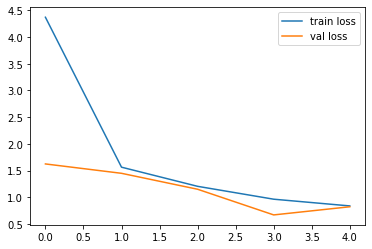

In [12]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

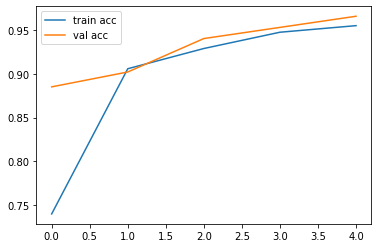

In [13]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()